In [1]:
importation des packages
import pandas as pd
import re
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import spacy
from spacy import displacy
import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt
from transformers import pipeline
# On importe les fonctions de tokenisation de mots, de POS-Tagging et de reconnaissance d'entités de NLTK
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
df=pd.read_csv("C:/Users/sylva/OneDrive/Bureau/barometre/donnees_brutes_2021.csv", sep=";")
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")


C:\Users\sylva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
nlp = spacy.load('fr_core_news_md')

In [3]:
#on crée les coordonnées géographiques homogènes
p=re.compile('(\D*) \(([0-9]{2,2})[0-9]{3,3}\)')
def yo_ville(x):
    m=p.match(x)
    return m.group(1)+' ' +m.group(2)
df['Ville']=df['Commune'].apply(yo_ville)

Exemple de Chalons : résumé et notation de positivité

In [18]:
df_chalon=df[df['Commune']=='Châlons-en-Champagne (51000)']

In [19]:
df_nlp_chalon=df_chalon[['Endroit_problematique_pieton',
       'Endroit_le_plus_apprecie', 'Commentaires']]

In [71]:
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

display(df_nlp_chalon.Endroit_le_plus_apprecie)

5223                                                                                                                                                                                                                                                                                                                                                                                                                        Les jardins du jard\r\nRue piétonne du centre ville\r\nrue de marne
5224                                                                                                                                                                                                                                                                                                                                                                                                  Parler "appréciation" sous-entend "marche loisir" que je pratique le long des cours d'eau
5225                                    

In [18]:
df_nlp_chalon['Commentaires'].dropna().tolist()

['Faire respecter les lois et obligations: vitesse, stationnement des véhicules de livraison; priorité au piéton sur les passages.',
 'globalement satisfaisant. Très bonne cohabitation entre les usagers (voitures, trottinette vélos,...). Les conducteurs laissent facilement les piétons traverser.\r\nÇa manque de communication incitative (à la marche) et valorisante (comportements vertueux des automobilistes par exemple).\r\n',
 "Eviter de partager l'espace avec vélos et interdire stationnement sur trottoirs",
 'pas assez de verbalisation pour les véhicules sur les trottoirs , le non respect des passages piétons',
 'Ce n\'est pas la catastrophe dans la mesure où les trottoirs ne sont pas surencombrés comme dans des villes plus grandes et où il y a un relatif respect entre usagers. Les marges de progrès restent cependant énormes, que ce soit au niveau de la réduction des vitesses automobiles, l\'amélioration des traversées des carrefours/rond-point (et sans détours demesurés) ou encore le

In [35]:
com=df_nlp_chalon['Commentaires'].dropna().tolist()[0]
classifier(com)[0]['label']

'4 stars'

In [40]:
#on regarde les notations
l=[]
for com in df_nlp_chalon['Commentaires'].dropna().tolist()[:3]:
    l.append(classifier(com)[0]['label'])
for com in df_nlp_chalon['Commentaires'].dropna().tolist()[5:]:
    l.append(classifier(com)[0]['label'])
l


['4 stars',
 '4 stars',
 '1 star',
 '5 stars',
 '3 stars',
 '4 stars',
 '2 stars',
 '1 star',
 '4 stars',
 '4 stars',
 '5 stars',
 '1 star',
 '1 star',
 '1 star',
 '3 stars',
 '3 stars',
 '1 star',
 '3 stars',
 '3 stars',
 '4 stars',
 '5 stars',
 '2 stars',
 '2 stars',
 '2 stars',
 '2 stars',
 '4 stars',
 '3 stars',
 '2 stars',
 '3 stars',
 '3 stars',
 '5 stars',
 '5 stars',
 '3 stars',
 '5 stars',
 '5 stars',
 '3 stars',
 '1 star',
 '2 stars',
 '3 stars',
 '2 stars',
 '3 stars',
 '1 star',
 '2 stars',
 '2 stars',
 '1 star']

In [29]:
classifier(com)[0]["label"]

'4 stars'

In [56]:
classifier3=pipeline('summarization',model='moussaKam/barthez-orangesum-abstract')

In [57]:
com=df_nlp_chalon['Commentaires'].dropna().tolist()[5]
classifier3(com)

Your max_length is set to 100, but you input_length is only 42. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[{'summary_text': "C'est une démarche citoyenne qui ne passe pas inaperçue. Alors que les piétons et les cyclistes sont de plus en plus nombreux à déambuler dans les rues de la cité phocéenne, c'est au tour de la maire Anne Hidalgo de lancer un appel à l'aide."}]

In [58]:
classifier3("L'avenir est à la piétonisation des centres-villes des villes françaises et à l'incitation à prendre les transports en commun au lieu des voitures pour aller faire les courses.\r\nCertains voudront freiner cet avenir mais il est heureusement inévitable après des décennies de tout voiture.")

Your max_length is set to 100, but you input_length is only 55. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[{'summary_text': 'Certains voudront freiner cet avenir mais il est heureusement inévitable après des décennies de tout voiture.'}]

In [59]:
classifier3("""Ce n\'est pas la catastrophe dans la mesure où les trottoirs ne sont pas surencombrés comme dans des villes plus grandes et où il y a un relatif respect entre usagers. Les marges de progrès restent cependant énormes, que ce soit au niveau de la réduction des vitesses automobiles, l\'amélioration des traversées des carrefours/rond-point (et sans détours demesurés) ou encore le "cadre paysager" de la marche. Le problème de fond est que la marche n\'est aucunement perçue comme un mode de déplacement à part entière alors même qu\'elle a de nombreux atouts, même en matière de requalification d\'un centre-ville encore très marqué par le stationnement automobile (et le stationnement auto, très consommateur d\'espace public, semble être sacré. Et même le vélo, qui commence tout juste à être reconnu à sa juste valeur comme mode de déplacement, se développe au détriment de l\'espace dédié à la marche et jamais sur l\'espace dédié à la voiture (on va mettre des arceaux vélos sur un trottoir étroit alors même qu\'il suffit de prendre une place voiture à côté, ou encore créer une piste cyclable sur un trottoir fort fréquenté et déjà peu large, plutôt que de toucher à la 2 fois 2 voies...). La marche devrait aussi être le mode prédominant des enfants pour aller à l\'école: la réalité est tout autre et aucune communication/sensibilisation n\'est initiée pour tenter de casser ce cercle vicieux de la dépose des enfants en voiture. La problématique est assez similaire pour le vélo et je n\'ose même pas parler des PMR. Au niveau des traversées piétonnes, l\'aspect visibilité/sécurité n\'est pour ainsi dire jamais pris en compte à l\'image des véhicules en stationnement qu\'on laisse au plus près des passages piétons et qui cachent la visibilité. Défenseur de la marche, j\'angoisse toujours par rapport à mes enfants qui doivent rejoindre l\'école en passant par ces traversées à risque.\r\nSur la marche sportive, elle est à peine plus prise en compte. La commune est pourtant desservie par deux itinéraires emblématiques: chemin de Saint-Jacques de Compostelle et Via Francigena. Bravo pour l\'initiative de ce baromètre de la marche. L\'équivalent pour le vélo a permis de commencer à faire grandir la prise en compte du mode vélo. Et n\'oublions pas que le cycliste est un piéton véloce!""", max_length=512)

Your max_length is set to 512, but you input_length is only 488. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[{'summary_text': "Le baromètre de la marche publié mercredi par le Corriere della Sera révèle que la ville de Florence (Italie) n'est pas perçue comme un mode de déplacement à part entière alors qu'elle dispose de nombreux atouts."}]

In [60]:
classifier3('A mort les voitures')

Your max_length is set to 100, but you input_length is only 6. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[{'summary_text': 'A mort les voitures, vive la solidarité !'}]

In [62]:
classifier3("Traversée des rues par les passages protégés: il faut admettre que les automobilistes se sont révélés de plus en plus prudents en laissant la priorité aux piétons engagés. (Ce qui est la réglementation). Mais malheureusement subsiste encore une petite minorité d'automobilistes dangereux qui ne respectent pas cette règle. Une sévérité accrue s'imposerait vis à vis d'eux.",)

Your max_length is set to 100, but you input_length is only 73. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[{'summary_text': 'Traversée des rues par les passages protégés: il faut admettre que les automobilistes se sont révélés de plus en plus prudents.'}]

In [63]:
l=[]
for com in df_nlp_chalon['Commentaires'].dropna().tolist():
    l.append(classifier3(com)[0]['summary_text'])
l

Your max_length is set to 100, but you input_length is only 24. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 54. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 16. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 20. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 42. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 29. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 56. You might consider

['La priorité est donnée aux piétons, aux cyclistes et aux personnes âgées.',
 'Bonne cohabitation entre les usagers de la route et les piétons. Les premiers résultats sont (beaucoup) positifs.',
 "Eviter de partager l'espace avec vélos et interdire stationnement sur trottoirs",
 'Pas assez de verbalisation pour les véhicules sur les trottoirs, le non respect des passages piétons',
 "Le baromètre de la marche publié mercredi par le Corriere della Sera révèle que la ville de Florence (Italie) n'est pas perçue comme un mode de déplacement à part entière alors qu'elle dispose de nombreux atouts.",
 "C'est une démarche citoyenne qui ne passe pas inaperçue. Alors que les piétons et les cyclistes sont de plus en plus nombreux à déambuler dans les rues de la cité phocéenne, c'est au tour de la maire Anne Hidalgo de lancer un appel à l'aide.",
 'De nombreuses actions ont été menées mais il reste encore des endroits à sécuriser et une signalétique plus importante pour les circuits pédestres.',


In [64]:
l=[]
for com in df_nlp_chalon['Endroit_problematique_pieton'].dropna().tolist():
    l.append(classifier3(com)[0]['summary_text'])
l

Your max_length is set to 100, but you input_length is only 15. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 26. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 62. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 61. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 8. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 29. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 48. You might consider 

Your max_length is set to 100, but you input_length is only 21. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 31. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 19. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 48. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 24. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 100, but you input_length is only 22. You might consider 

["Rond point de l'hémicycle Rond point du jet d'eau",
 'Le bvd hippolythe faure est mal éclairé. Les piétons ne voient pas les voitures qui arrivent de leur droite (préfecture), traverser ici est périlleux.',
 'Pas de sonnette pour prévenir lespiétons difficultés en centre ville',
 "En venant de la place de Verdun et en se dirigeant avenue Sarrail , à l 'entrée de la rue les voitures sont tout le temps sur le trottoir , rajouter à cela les poubelles !! piétons , et surtout fauteuil roulant.",
 "La plupart des entrées de ville et secteurs des écoles seront fermés aux heures de rentrée et de sortie d'école, selon les prévisions du ministère de l'Education nationale.",
 'Rue Prieur de la Marne, dans le 11e arrondissement de Paris.',
 "Les cyclistes et les trottinettes sont rois en ce qui concerne l'avenue Jean Jaurès.",
 "Tous les centres commerciaux de Jardiland sont interdits aux piétons et aux cyclistes. C'est la consigne donnée par la mairie dans le cadre du projet de loi Mobilités 20

In [21]:
#tetative pour voir si la reconnaissance de lieu est possible

# On crée une phrase en anglais
text_en = "Mark Elliot Zuckerberg (born May 14, 1984) is a co-founder of Facebook in San Francisco."

# On tokenise la phrase
tokens_en = word_tokenize(text_en)

# On tague les tokens
tags_en = pos_tag(tokens_en)

# On applique la fonction de reconnaissance d’entités
ner_en = ne_chunk(tags_en)

# On affiche le résultat
print (ner_en)

(S
  (PERSON Mark/NNP)
  (PERSON Elliot/NNP Zuckerberg/NNP)
  (/(
  born/VBN
  May/NNP
  14/CD
  ,/,
  1984/CD
  )/)
  is/VBZ
  a/DT
  co-founder/NN
  of/IN
  (GPE Facebook/NNP)
  in/IN
  (GPE San/NNP Francisco/NNP)
  ./.)


In [23]:
df_nlp_chalon_pb=df_chalon['Endroit_problematique_pieton']

In [112]:
for commentaire in df_nlp_chalon_pb :
    if commentaire==str(commentaire) :
        tokens_en = word_tokenize(commentaire)
        tags_en = pos_tag(tokens_en)
        ner_en = ne_chunk(tags_en)
        print (ner_en)

NameError: name 'df_nlp_chalon_pb' is not defined

In [ ]:
df_nlp_chalon_commentaire=df_nlp_chalon['Commentaires']

Une partie plus intéressante : recherche de champs lexical

In [4]:
df_marseille=df[df['Ville']=='Marseille 13']

In [5]:
df_nlp_marseille=df_marseille[['Endroit_problematique_pieton',
       'Endroit_le_plus_apprecie', 'Commentaires']]

In [7]:
df_nlp_marseille_commentaire=df_nlp_marseille['Commentaires']
df_nlp_marseille_pb=df_nlp_marseille['Endroit_problematique_pieton']
df_nlp_marseille_appr=df_nlp_marseille['Endroit_le_plus_apprecie']

In [8]:
def freq_velo(df_commentaire, liste_racine):
    freq=0
    nbre_occurrence=0
    a=0
    liste=[]
    phrase_concernant_theme=[]
    liste_re=[]
    for racine in liste_racine :
        liste_re.append(re.compile(racine))
    for commentaire in df_commentaire :
        phrase_concernant=[]
        a+=1
        if commentaire==str(commentaire) :
            compteur=True
            for regex in liste_re :
                if compteur and (regex.search(commentaire) != None)  :
                    freq+=1
                    comm=sent_tokenize(commentaire)
                    compteur=False
                    for com in comm :
                        compteur_phrase=True
                        for reg in liste_re :
                            if compteur_phrase and reg.search(commentaire) != None :
                                compteur_phrase=False
                                liste.append(classifier(comm)[0]['label'])
                                nbre_occurrence+=1
                                phrase_concernant.append(com)
        phrase_concernant_theme.append(phrase_concernant)
    note_liste=[]
    for note in liste :
        note_liste.append(float(note[0]))

    print('nombre commentaire où apparait',freq, 'nombre total de commentaires', a, sum(note_liste)/len(note_liste), nbre_occurrence)
freq_velo(df_nlp_marseille_commentaire, ['vél','cycl','velo'])

nombre commentaire où apparait 125 nombre total de commentaires 1373 3.0616438356164384 292


In [9]:
stop_words = set(stopwords.words('french')) 
texte_epure=[]
for commentaire in df_nlp_marseille_commentaire :    
    if commentaire==str(commentaire) :
        commentaire=commentaire.lower()
        words = word_tokenize(commentaire) 
        new_sentence = []
        
        for word in words:
            if word not in stop_words:
                new_sentence.append(word) 
        texte_epure+=new_sentence
texte_epure=str(texte_epure)

In [10]:
def frequence(texte):
    words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', texte)
    frequency  = {}
    for word in words:
        word = word.lower()
        count = frequency.get(word,0)
        frequency[word] = count + 1
    df = pd.DataFrame(list(frequency.items()), columns=['Word', 'Frequency'])
    return df
df_marseille=frequence(str(texte_epure))

In [11]:
df_marseille['Rang'] = df_marseille.Frequency.rank(ascending=False)
df_marseille.sort_values('Rang', inplace = True)
df_marseille.head(5)

,Word,Frequency,Rang
3,ville,285,1.0
9,trottoirs,245,2.0
10,marseille,177,3.0
38,est,150,4.0
82,plus,131,5.0


In [5]:
def epure_texte(question, df=df) :
    stop_words = set(stopwords.words('french')) 
    texte_epure=[]
    for commentaire in df[question] :    
        if commentaire==str(commentaire) :
            commentaire=commentaire.lower()
            words = word_tokenize(commentaire) 
            new_sentence = []

            for word in words:
                if word not in stop_words:
                    new_sentence.append(word) 
            texte_epure+=new_sentence
    texte_epure=str(texte_epure)
    return texte_epure
texte_epure=epure_texte('Endroit_problematique_pieton', df[df['Lors_de_vos_deplacements']=='Une personne a mobilité réduite'])

In [4]:
df['Lors_de_vos_deplacements'].unique()

array(["Un cycliste ou un utilisateur d'engin de déplacement personnel (vélo, trottinette, skate, roller…)",
       'Un marcheur, un piéton',
       'Un utilisateur des transports en commun',
       'Un utilisateur de véhicule motorisé (moto et autres deux roues, voitures à moteur à essence, gasoil...)',
       "Un utilisateur d'engin de déplacement personnel à assistance électrique (vélo, trottinette, skate électrique...)",
       'Une personne a mobilité réduite', nan], dtype=object)

fonction pour créer des nuages de mots

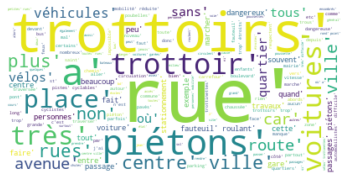

In [7]:
def make_wordcloud(corpus):
    wc = wordcloud.WordCloud( max_words=2000,background_color='white')
    wc.generate(corpus) #crée le nuage de mots
    return wc
def nuage (texte_epure):
    plt.imshow(make_wordcloud(str(texte_epure)), interpolation='bilinear')
    plt.axis("off")
    plt.show()
nuage(epure_texte('Endroit_problematique_pieton', df[df['Lors_de_vos_deplacements']=='Une personne a mobilité réduite']))


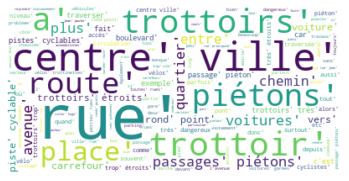

In [8]:
nuage(epure_texte('Endroit_problematique_pieton', df))

In [14]:
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', texte_epure)

stemmer = SnowballStemmer(language='french')

stemmed = [stemmer.stem(word) for word in words]

In [15]:
df_marseille_orth=frequence(str(stemmed))
df_marseille_orth['Rang'] = df_marseille_orth.Frequency.rank(ascending=False)
df_marseille_orth.sort_values('Rang', inplace = True)
df_marseille_orth.head(50)

,Word,Frequency,Rang
30,parc,325,1.0
1,cornich,293,2.0
20,port,226,3.0
19,vieux,205,4.0
23,calanqu,197,5.0
18,prado,118,6.0
62,mer,113,7.0
109,bord,105,8.0
14,longchamp,93,9.0
63,vill,91,10.0


In [16]:


doc = nlp(str(df_nlp_marseille_pb.dropna()))
displacy.render(doc, style="ent", jupyter=True)

In [18]:
def return_NER(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner le texte et le label pour chaque entité
    return [(X.text, X.label_) for X in doc.ents]
return_NER(str(df_nlp_marseille_pb.dropna()))




[('Canebière', 'PER'),
 ('Corniche', 'LOC'),
 ('Vieux Por', 'LOC'),
 ('Name: Endroit_problematique_pieton', 'MISC'),
 ('Length', 'MISC')]

récupération de noms de voies

In [48]:
#on liste des types de voie
reg_rue=re.compile(r'(rue\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_avenue=re.compile(r'(avenue\s[^,.;!\n\r+:\(\)/\\]{3,20})')
reg_cours=re.compile(r'(cours\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_boulevard=re.compile(r'(boulevard\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_traverse=re.compile(r'(traverse\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_impasse=re.compile(r'(impasse\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_rond=re.compile(r'(rond-point\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_quartier=re.compile(r'(quartier\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_allee=re.compile(r'(allée\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_route=re.compile(r'(route\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_chemin=re.compile(r'(chemin\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_quai=re.compile(r'(quai\s[^,.;!\n\r+:\(\)/]{3,20})')
reg_place=re.compile(r'(place\s[^,.;!\n\r+:\(\)/]{3,20})')
#puis on récupère les noms de voie
nom_voie=[reg_rue, reg_avenue, reg_cours, reg_boulevard, reg_traverse, reg_impasse, reg_rond, reg_quartier, reg_allee,
         reg_route, reg_chemin, reg_quai]
def standardiser(i) : 
    i=i.lower()#on harmonise les notations
    i=i.replace('bd ', 'boulevard ')
    i=i.replace('blv ', 'boulevard ')
    i=i.replace('bld ', 'boulevard ')
    i=i.replace('av ', 'avenue ')
    i=i.replace('rte ', 'route ')
    i=i.replace('st ', 'saint ')
    i=i.replace('st-', 'saint ')
    i=i.replace('saint-', 'saint ')
    i=i.replace('ste ', 'sainte ')
    i=i.replace('ste-', 'sainte')
    i=i.replace('sainte-', 'sainte ')
    i=i.replace('é', 'e')
    i=i.replace('è', 'e')
    i=i.replace('ê', 'e')
    return i
def chercher_rue (df, nbre_occurence=2):
    #reg_place,
    liste=[]
    for i in df.dropna() :
        i=standardiser(i) 
        for reg in nom_voie :
            new_lieux=reg.findall(i)
            for new_lieu in new_lieux:
                if new_lieu!=[] and new_lieu[len(new_lieu)-1]==' ':
                    new_lieu=[new_lieu[:len(new_lieu)-1]]
                    liste+=new_lieu
                else:
                    liste+=[new_lieu]
    lieux={}
    nbre_lieu=[]
    liste_deslieux=[]
    for lieu in liste :
        liste_celieu=[]
        if lieu not in liste_deslieux :
            liste_deslieux.append(lieu)
            if len(lieu)>5:
                nb_lieu=0
                p=re.compile(lieu)
                iteration=0
                for comment in df.dropna() :# liste : 
                    comment=standardiser(comment)
                    if p.search(comment.lower()) !=None :
                        nb_lieu+=1
                        liste_celieu.append((comment,df.dropna().index[iteration]))
                    iteration+=1
                nbre_lieu.append((nb_lieu, lieu))
                lieux[lieu]=(liste_celieu)
    grd_nbre_lieu=[]
    for lieu in nbre_lieu :
        if lieu[0]>=nbre_occurence:
            grd_nbre_lieu.append(lieu)
    for lieu in return_NER(str(df.dropna())):
        lieu=standardiser(lieu[0])
        p=re.compile(lieu)
        nb_lieu=0
        iteration=0
        for comment in df.dropna():
            comment=standardiser(comment)
            if p.search(comment.lower()) != None :
                nb_lieu+=1
                liste_celieu.append((comment,df.dropna().index[iteration]))
            iteration+=1
        if nb_lieu>=nbre_occurence :
            grd_nbre_lieu.append((nb_lieu,lieu))
            lieux[lieu]=liste_celieu
    grd_nbre_lieu.sort(reverse=True)
    return grd_nbre_lieu, lieux#, index_lieux
(liste_marseille, lieux)=chercher_rue(df_nlp_marseille_pb)#, index_lieux

In [54]:
liste_marseille

[(55, 'canebiere'),
 (39, 'corniche'),
 (37, 'avenue du prado'),
 (35, 'vieux por'),
 (32, 'cours lieutaud'),
 (26, 'rue paradis'),
 (21, 'rue breteuil'),
 (17, 'rue de rome'),
 (15, 'cours julien'),
 (15, 'boulevard national'),
 (14, 'cours pierre puget'),
 (14, 'boulevard de la liberation'),
 (13, 'boulevard michelet'),
 (13, 'boulevard chave'),
 (12, 'boulevard baille'),
 (10, 'rue saint pierre'),
 (10, 'rue du rouet'),
 (10, 'boulevard sakakini'),
 (10, 'avenue de la corse'),
 (9, 'boulevard de la corderie'),
 (9, 'boulevard charles livon'),
 (8, 'rue saint ferreol'),
 (8, "boulevard d'athenes"),
 (7, 'rue fort notre dame'),
 (7, 'boulevard notre dame'),
 (7, 'boulevard longchamp'),
 (7, 'avenue de mazargues'),
 (6, 'rue sainte'),
 (6, 'rue de lyon'),
 (5, 'rue saint savournin'),
 (5, 'rue de bruys'),
 (5, 'rue de breteuil'),
 (5, "rue d'italie"),
 (5, 'rue consolat'),
 (5, 'boulevard voltaire'),
 (5, 'boulevard sainte marguerite'),
 (5, 'boulevard perier'),
 (5, 'boulevard du prad

In [37]:
lieux['avenue du prado']

[("C'est à peine croyable, rien n'est aménagé pour les piétons, les personnes à mobilités réduites, les poussettes, les vélos, toute cette magnifique ville, je dis bien toute la ville, est aménagée pour la voiture privée individuelle jusqu'à aujourd'hui.\r\nNous sommes toujours bloqués dans un éco-musée des années 70-80 (Exemples non exhaustifs: Boulevard Baille, Boulevard des Dames, Boulevard de la Corderie, Cours Pierre Puget, Boulevard André Aune, Boulevard National, Avenue du Prado, Boulevard Michelet, Boulevard d'Athènes, Allées Meillan, rue du rouet, rue Belle de Mai, Place Sébastopol, le quartier du Chapitre, rue Consolat, rue Flégier, quartier des Catalans, partout, etc...)\r\nIl est autorisé par arrêté municipal de se garer à cheval sur les trottoirs, les trottoirs ne sont pas aux normes, les intersections non réglementaires, les passages piétons sont souvent très peu visibles, les réglages des feux circulations sont réglés uniquement pour les voitures privées individuelles, l

In [103]:
reg_bd=re.compile(r'(bd\s[^,.;!\n\r+:\(\)/]{0,20})')
reg_rue=re.compile(r'(rue\s[^,.;!\n\r+:\(\)/]{0,20})')#[,\s]$
reg_avenue=re.compile(r'(avenue\s[^,.;!\n\r+:\(\)/\\]{0,20})')
reg_cours=re.compile(r'(cours\s[^,.;!\n\r+:\(\)/]{0,20})')
reg_boulevard=re.compile(r'(boulevard\s[^,.;!\n\r+:\(\)/]{0,20})')
reg_traverse=re.compile(r'(traverse\s[^,.;!\n\r+:\(\)/]{0,20})')
reg_impasse=re.compile(r'(impasse\s[^,.;!\n\r+:\(\)/]{0,20})')

#reg_place=re.compile(r'(place\s[^,.;!\n:\(\)/-]{0,20})')
reg_rond=re.compile(r'(rond-point\s[^,.;!\n\r+:\(\)/]{0,20})')
reg_quartier=re.compile(r'(quartier\s[^,.;!\n\r+:\(\)/]{0,20})')
nom_voie=[reg_rue, reg_avenue, reg_cours, reg_boulevard, reg_traverse, reg_impasse, reg_bd,  reg_rond, reg_quartier]#reg_place,
liste=[]
for i in df_nlp_marseille_pb.dropna() :
    i=i.lower()
    i=i.replace('bd ', 'boulevard ')
    for reg in nom_voie :
        new_lieux=reg.findall(i)
        for new_lieu in new_lieux:
            if new_lieu!=[] and new_lieu[len(new_lieu)-1]==' ':
                print(new_lieu)
                new_lieu=[new_lieu[:len(new_lieu)-1]]
                liste+=new_lieu
            else:
                liste+=[new_lieu]    

In [38]:

liste_marseille

[(44, 'Canebière'),
 (39, 'Corniche'),
 (35, 'avenue du prado'),
 (35, 'Vieux Por'),
 (32, 'cours lieutaud'),
 (26, 'rue paradis'),
 (21, 'rue breteuil'),
 (17, 'rue de rome'),
 (15, 'cours julien'),
 (14, 'cours pierre puget'),
 (10, 'rue du rouet'),
 (10, 'boulevard national'),
 (10, 'boulevard de la libération'),
 (10, 'boulevard chave'),
 (10, 'avenue de la corse'),
 (8, 'boulevard michelet'),
 (7, 'rue saint pierre'),
 (7, 'rue fort notre dame'),
 (7, 'boulevard sakakini'),
 (7, 'boulevard de la corderie'),
 (7, 'boulevard charles livon'),
 (7, 'avenue de mazargues'),
 (6, 'rue sainte'),
 (6, 'rue de lyon'),
 (6, "boulevard d'athènes"),
 (6, 'boulevard baille'),
 (5, 'rue de bruys'),
 (5, 'rue de breteuil'),
 (5, "rue d'italie"),
 (5, 'rue consolat'),
 (5, 'boulevard notre dame'),
 (4, 'rue marx dormoy'),
 (4, 'rue de la grande armée'),
 (4, "rue d'endoume"),
 (4, 'quartier vauban'),
 (4, 'cours puget'),
 (4, 'cours du combattant'),
 (4, 'boulevard des dames'),
 (4, 'avenue des ch

In [168]:
df_nlp_marseille_pb

11582                                          rue ferrari
11583                                                  NaN
11584    Dans cet arrondissement où les rues sont étroi...
11585                                     Il y en a trop. 
11586                     le carrefour Canebière/garibaldi
                               ...                        
12950    aux abords des écoles, grande dangerosité pour...
12951    Toute la moitié nord de la ville est dangereus...
12952    Toutes les petites rues du centre ville avec d...
12953                                                  NaN
12954                                      Le centre-ville
Name: Endroit_problematique_pieton, Length: 1373, dtype: object

In [177]:
u=re.compile('(canebi.re)')
canebiere=0
for com in df_nlp_marseille_pb :
    if com==str(com):
        yest=u.findall(com.lower())
        if yest!=[]:
            canebiere+=1
        
canebiere

55

In [178]:
u=re.compile('(canebi.re)')
canebiere=0
for com in df[df['Ville']=='Marseille 13']['Endroit_le_plus_apprecie'] :
    if com==str(com):
        yest=u.findall(com.lower())
        if yest!=[]:
            canebiere+=1
        
canebiere

95

In [179]:
u=re.compile('(corniche)')
canebiere=0
for com in df_nlp_marseille_pb :
    if com==str(com):
        yest=u.findall(com.lower())
        if yest!=[]:
            canebiere+=1
        
canebiere

39

In [182]:
u=re.compile('(corniche)')
canebiere=0
for com in df[df['Ville']=='Marseille 13']['Endroit_le_plus_apprecie'] :
    if com==str(com):
        yest=u.findall(com.lower())
        if yest!=[]:
            canebiere+=1
        
canebiere

292

In [172]:
liste_bien_mars=chercher_rue(df[df['Ville']=='Marseille 13']['Endroit_le_plus_apprecie'])
print(liste_bien_mars)

[(55, 'quartier'), (39, 'boulevard longchamp'), (28, 'cours julien'), (27, 'boulevard chave'), (17, 'avenue du prado'), (16, 'rue de la république'), (14, 'quartier du panier'), (9, 'rue paradis'), (8, 'rue de rome'), (8, 'boulevard michelet'), (6, 'rue saint ferreol'), (6, 'boulevard longchamps'), (5, 'rue saint féréol'), (5, 'quai du port'), (4, 'rue saint ferréol'), (4, 'quai de la joliette'), (3, 'rue sainte'), (3, 'quartier du camas'), (3, 'cours lieutaud'), (3, 'cours belsunce'), (3, 'boulevard notre dame'), (3, 'boulevard du prado'), (2, 'rue benoit malon'), (2, 'route urbaine'), (2, 'quartier vauban'), (2, 'quartier roucas'), (2, 'quartier opera'), (2, 'quartier de l’opéra'), (2, 'quai des belges'), (2, 'cours joseph thierry'), (2, "cours estienne d'orves"), (2, "chemin le long de l'huveaun"), (2, "chemin de l'huveaune"), (2, 'boulevard montricher'), (2, 'boulevard lonchamp'), (2, 'boulevard du redon'), (2, 'boulevard baille'), (2, 'avenue longchamp'), (2, 'avenue kennedy'), (2

In [165]:
liste_com_mars=chercher_rue(df[df['Ville']=='Marseille 13']['Commentaires'])
print(liste_com_mars)

[(13, 'quartier'), (9, 'route où'), (9, 'cours lieutaud'), (6, 'rue paradis'), (6, 'cours du combattant'), (4, 'avenue du prado'), (2, 'rue pietonne'), (2, 'boulevard chave')]


In [130]:
liste_paris=chercher_rue(df[df['Ville']=='Paris 75']['Endroit_problematique_pieton'])

In [133]:
len(liste_paris)

204

In [158]:
liste=[]
for i in df_nlp_marseille_appr.dropna() :
    for reg in nom_voie :
        liste+=reg.findall(i+' ')
liste

190

In [163]:
code=re.compile(r'13\d{3,3}')
liste=[]
for i in df_nlp_marseille_appr.dropna() :
    liste+=code.findall(i)

['13002',
 '13009',
 '13005',
 '13012',
 '13013',
 '13008',
 '13012',
 '13008',
 '13009',
 '13001',
 '13012',
 '13012',
 '13007',
 '13007',
 '13002',
 '13008',
 '13008',
 '13008',
 '13012',
 '13009',
 '13014',
 '13014',
 '13015',
 '13011',
 '13013',
 '13012',
 '13009']

In [165]:
arrond=re.compile(r'\d{0,2} .{0,15}arrondisse')
liste=[]
for i in df_nlp_marseille_appr.dropna() :
    liste+=arrond.findall(i)
liste

[' 2ème arrondisse',
 ' 6ème arrondisse',
 ' du 8ieme arrondisse',
 ' du 7ème arrondisse',
 ' quartier (5ème arrondisse',
 ' 12e arrondisse',
 ' 7ème arrondisse',
 ' et 10èmes arrondisse',
 ' mairie 12 arrondisse',
 ' le cinquième arrondisse',
 ' dans le 10ème arrondisse',
 ' dans le 7ème arrondisse',
 ' du 7ème arrondisse']

In [149]:
liste=[]
reg_rond=re.compile(r'(rond-point\s[^,.;!\n:\(\)/-]{0,20})')
for i in df_nlp_marseille_pb.dropna() :
    liste+=reg_rond.findall(i+' ')
liste

['rond-point du Prado doit être r', 'rond-point Pierre Paraf ']

In [77]:
str(df_nlp_marseille_pb.dropna())

"11582                                          rue ferrari\n11584    Dans cet arrondissement où les rues sont étroi...\n11585                                     Il y en a trop. \n11586                     le carrefour Canebière/garibaldi\n11587    Hors Prado, Corniche, Vieux Por, toutes les ru...\n                               ...                        \n12949    L'ensemble de la ville est une catastrophe pou...\n12950    aux abords des écoles, grande dangerosité pour...\n12951    Toute la moitié nord de la ville est dangereus...\n12952    Toutes les petites rues du centre ville avec d...\n12954                                      Le centre-ville\nName: Endroit_problematique_pieton, Length: 997, dtype: object"